<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/D201_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the packages 
import pandas as pd
import numpy as np

In [49]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
kaggle datasets download -d fedesoriano/stroke-prediction-dataset       # gives invalid syntax error; not a Python-valid syntax; json?

In [6]:
# Upload kaggle API key file   # this works well from downloaded file
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [65]:
healthds = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [66]:
healthds.shape

(5110, 12)

In [11]:
healthds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [67]:
healthds.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
healthds.bmi[:10]

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
5    29.0
6    27.4
7    22.8
8     NaN
9    24.2
Name: bmi, dtype: float64

In [68]:
health_int = healthds.interpolate()      # linear interpolation between consecutive values around NAN

In [69]:
health_int.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

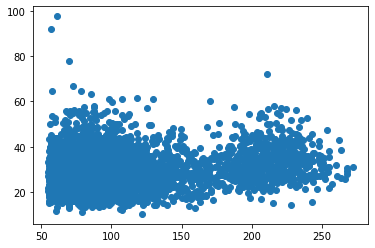

In [38]:
import matplotlib.pyplot as plt
plt.scatter(health_int['avg_glucose_level'], health_int['bmi'])      # how glucose_level relates to bmi in the interpolated bmi dataset

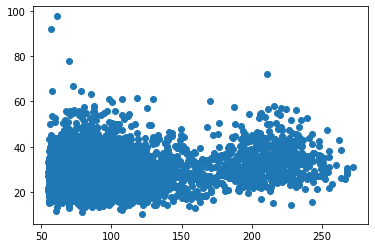

In [37]:
plt.scatter(healthds['avg_glucose_level'], healthds['bmi'])        # how glucose_level relates to bmi in the bmi dataset with NANs

In [33]:
healthds.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [34]:
health_int.bmi.describe()   # compare stats of interpolated and ds with NANs -- they are almost identical 

count    5110.00000
mean       28.92728
std         7.77531
min        10.30000
25%        23.60000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

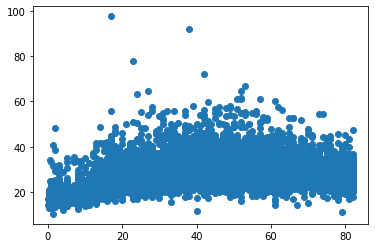

In [41]:
plt.scatter(health_int['age'], health_int['bmi']) 

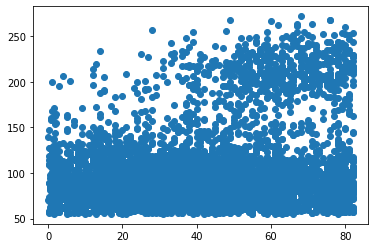

In [42]:
plt.scatter(health_int['age'], health_int['avg_glucose_level'])

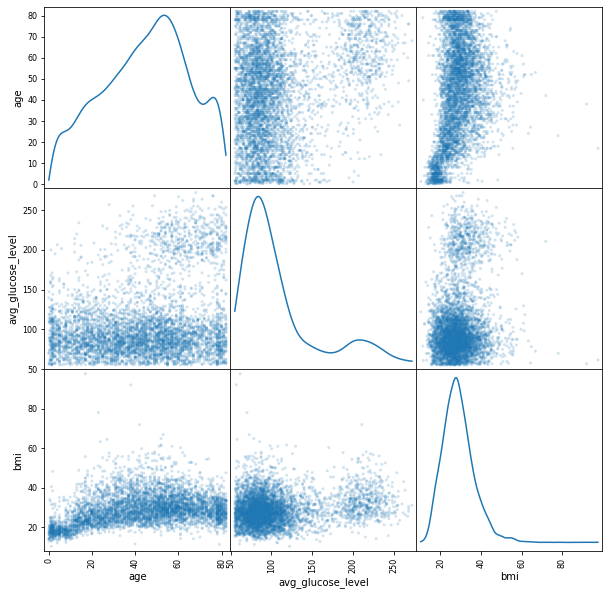

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(health_int[['age','avg_glucose_level','bmi']], alpha=0.2, figsize=(10,10), diagonal="kde");

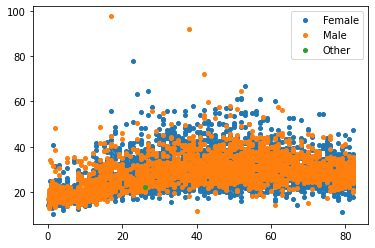

In [76]:
groups = health_int.groupby('gender')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.bmi, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()


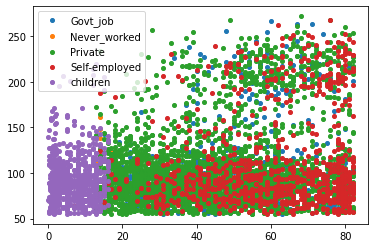

In [86]:
groups = health_int.groupby ('work_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.avg_glucose_level, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()